# Preparing dataset
This notebook is explaining how to create a dataset usable for Convolutional Neural Networks. It is meant as a proof of concept notebook and is thus not creating an entire dataset, but only a testset. The notebook contains:

- getting data
- making images with and without fire

- saving the images in their designated folder

- labelling the images with binary classes

-------------
Importing the needed packages and paths

In [1]:
import numpy as np
import sys
#folder where images will be saved (and loaded)
sys.path.append('C:\\Users\\krist\\Documents\\Syntese\\data\\NN_test')
#Folder with my own functions(my_s1 and my_modis)
sys.path.append('C:\\Users\\krist\\Documents\\Syntese\\code')
#Folder where im fetching the data from
sys.path.append('C:\\Users\\krist\\Documents\\Syntese\\data\\s1')
#my functions
import my_s1 as s1
import my_modis as md
import scipy.misc

# S1 images


Firslty, working with sentinel 1 images. This is made as a test. Therefore, one s1 image will be loaded in which a known fire is present (as known from the report made by the swedish goverment in 2018). This image will firstly be cropped to a smaller image. 

Then, several centroids will be defined by their row and column. These centroids are placed where there is a fire and using them, a box with size 500x500 pixels will be made.  These boxes then contain fires. Then, the boxes will be saved in their fire folder.


Next, the same will be done, but with boxes in which no fires are present. These will then be saved in the no_fire folder.

--------------------

### Getting images

Get s1 images using my own functions.




In [2]:
folder_path = "C:\\Users\\krist\\Documents\\Syntese\\data\\s1\\sweden\\geotif"
img_paths = s1.file_paths(folder_path,verbose=1,file_type='tif')
#Since this is proof of concept, only one image will be used.
which_pic = 2
img_path = img_paths[which_pic]
images,raster,extend, names, extra = s1.get_img([img_path],data_type='ENVI')


there are: 8  . tif  files in folder
images loading

1 images are being loaded
imgage 1
There are 2 bands


------------
### See img

Displaying the entire image with latitude and longitude, which is easier to understand.

for the picture chosen(23 july), both the VV and VH bands are aquired. These will both be used

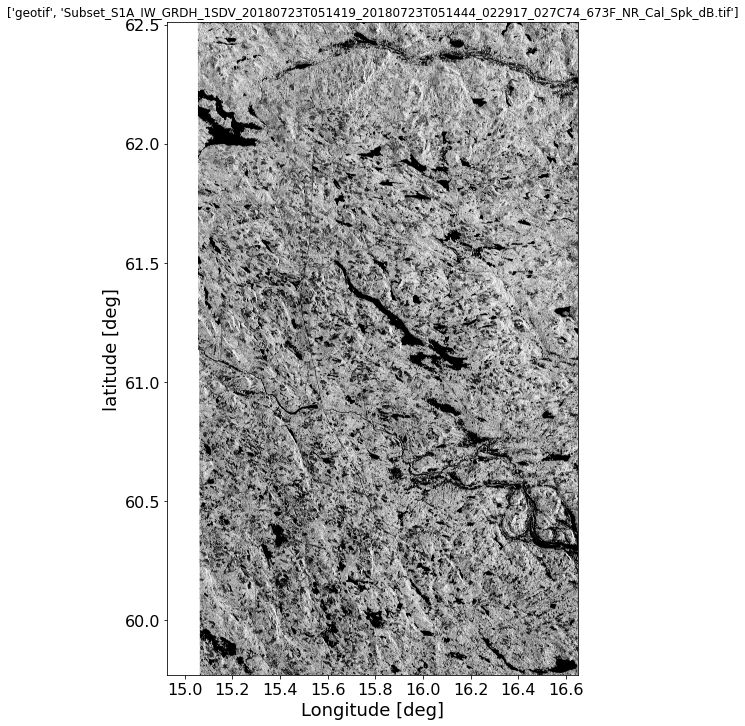

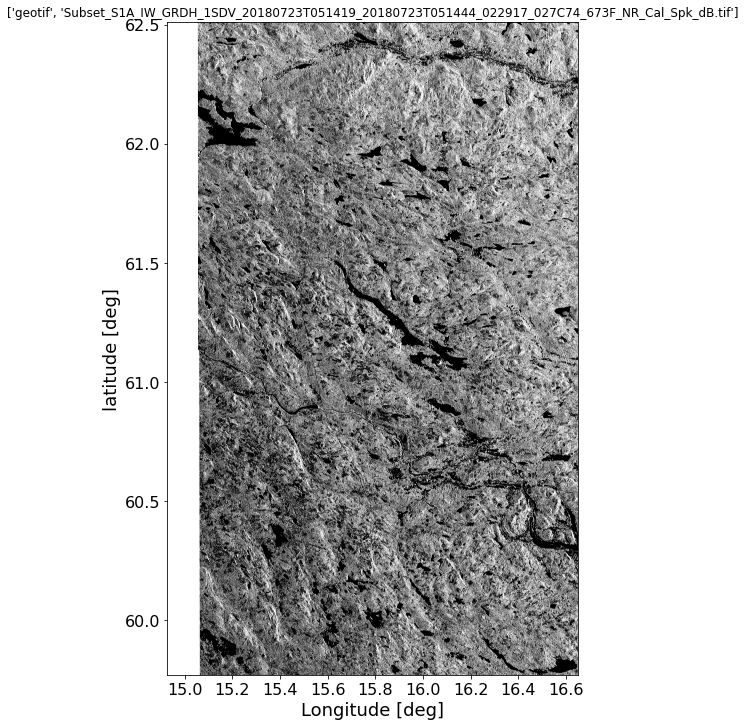

In [3]:
import math
for n in range(len(images)):
    s1.s1_show(images[n],extend[math.ceil(n/2)],names[math.ceil(n/2)])

The above two pictures are the VV and VH band respectivly, as calibrated and preprocsed in esa SNAP.

From these, subsets will be made.

--------------
### Looking at subset

Zooming in, to the approximate location where the fire happend(see red square).

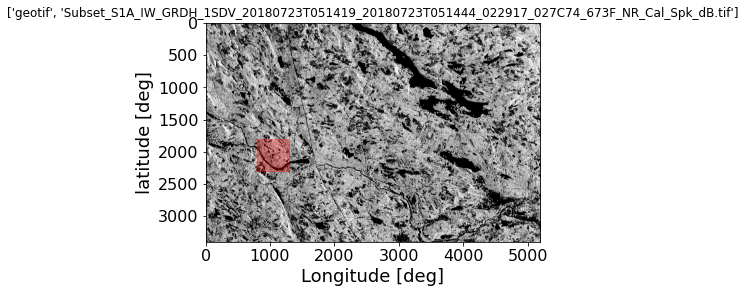

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
#picking the first band.
n = 0
fig, axs = plt.subplots(figsize=(6,12), facecolor='w', edgecolor='k') 
axs.imshow(images[n][5000:8400,1200:6400],cmap='binary')
plt.title(str(names[n]))
plt.xlabel('Longitude [deg]', fontsize=18)
plt.ylabel('latitude [deg]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#making the rectangle usable for long/lat and row/column.
rect = plt.Rectangle((15.93, 61.8), 0.2, -0.1, color='r', alpha=0.3)
rect = plt.Rectangle((800, 1800), 500, 500, color='r', alpha=0.3)
axs.add_patch(rect)
plt.show()

--------------
### Making Fire images

The fire happend around the plotted area, see e.g. PDF on fires. Now, we will crop out the area of interest, and from it, make a small training set.

In [5]:
names[0][1]

'Subset_S1A_IW_GRDH_1SDV_20180723T051419_20180723T051444_022917_027C74_673F_NR_Cal_Spk_dB.tif'

In [6]:
img_cont = []
for i in range(len(images)):
    img_cont.append(images[i][6000:7800,1200:3000])

Make fire training set:

from the cropped image, defined centroids where there is a fire. These centroids are then used to define a box according to the report. 
Then, these boxes are saved as images.

Note. There is fire in the image, that is not  within the boxes. This doesnt matter since this is proof of concept.

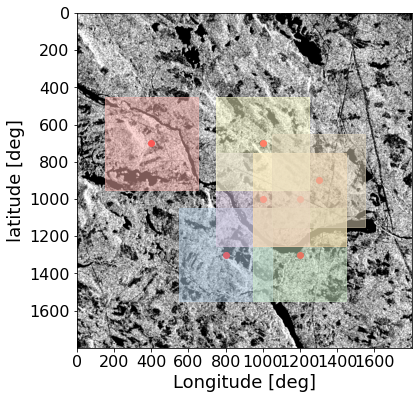

In [7]:
centroids = []
centroids.append([400,700])
centroids.append([800,1300])
centroids.append([1200,1300])
centroids.append([1000,1000])
centroids.append([1200,1000])
centroids.append([1000,700])
centroids.append([1300,900])

fig, axs = plt.subplots(figsize=(6,12), facecolor='w', edgecolor='k') 
axs.imshow(img_cont[0],cmap='binary')
plt.xlabel('Longitude [deg]', fontsize=18)
plt.ylabel('latitude [deg]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

jet= plt.get_cmap('Pastel1')
colors = iter(jet(np.linspace(0,1,10)))

for i in range(len(centroids)):
    rect = plt.Rectangle((centroids[i][0]-250,centroids[i][1]-250), 500, 500, alpha=0.5,color=next(colors))
    axs.add_patch(rect)
    axs.scatter(centroids[i][0],centroids[i][1], alpha=1, color='r')
    
plt.show()

Now taking the above illustrated squares, and turning them into images.

In [8]:
fire_images_band1 = []
fire_images_band2 = []

s1_box_size=500
s3_box_size=1500
    
    
#loop over number of centroids
for i in range(len(centroids)):
    #loop over number of images
    img = img_cont[0][centroids[i][0]-250:centroids[i][0]+250,centroids[i][1]-250:centroids[i][1]+250]
    img2 = img_cont[1][centroids[i][0]-250:centroids[i][0]+250,centroids[i][1]-250:centroids[i][1]+250]
    fire_images_band1.append(img)
    fire_images_band2.append(img2)

---------------
#### saving the images as numpy arrays in their folder.

using the function sath (saving array to file) to make the testset.

In [10]:
satf(fire_images_band2,name=names[0][1]+'_band2',class_type='fire',instrument='s1',data_folder='C:\\Users\\krist\\Documents\\Syntese\\data\\NN_test')

Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists
Files already exists


------------------
### No fire

No finding places where there are no fires and saving these similarty to how it was done with fires.

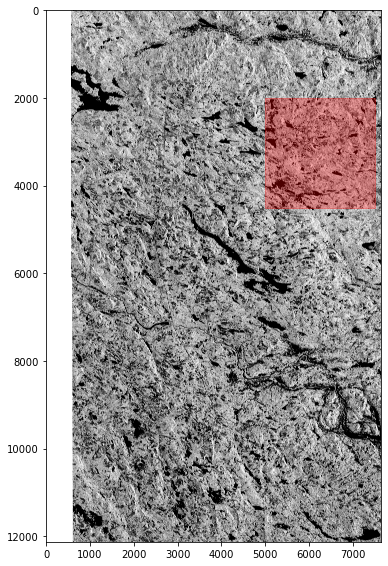

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
#picking the first band.
n = 0
fig, axs = plt.subplots(figsize=(6,12), facecolor='w', edgecolor='k') 
axs.imshow(images[n],cmap='binary')
rect = plt.Rectangle((5000, 2000), 2500, 2500, color='r', alpha=0.3)
axs.add_patch(rect)

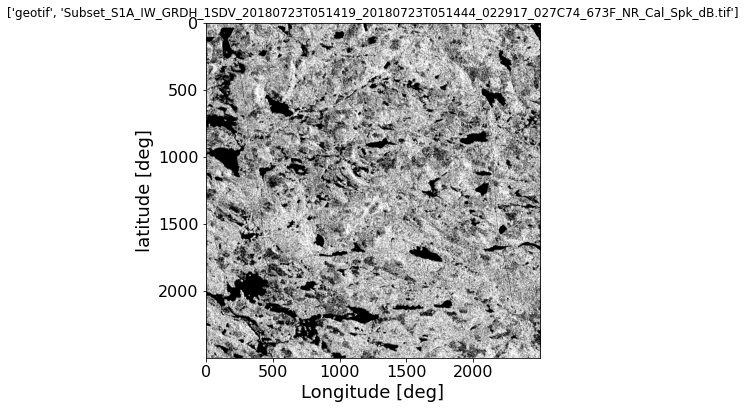

In [12]:
fig, axs = plt.subplots(figsize=(6,12), facecolor='w', edgecolor='k') 
axs.imshow(images[n][2000:4500,5000:7500],cmap='binary')
plt.title(str(names[n]))
plt.xlabel('Longitude [deg]', fontsize=18)
plt.ylabel('latitude [deg]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [13]:
img_cont_no_fire = []
for i in range(len(images)):
    img_cont_no_fire.append(images[i][2000:4500,5000:7500])

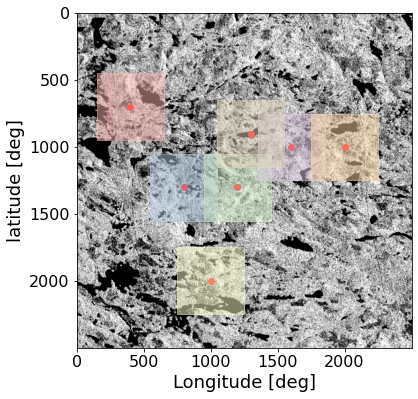

In [14]:
centroids = []
centroids.append([400,700])
centroids.append([800,1300])
centroids.append([1200,1300])
centroids.append([1600,1000])
centroids.append([2000,1000])
centroids.append([1000,2000])
centroids.append([1300,900])

fig, axs = plt.subplots(figsize=(6,12), facecolor='w', edgecolor='k') 
axs.imshow(img_cont_no_fire[0],cmap='binary')
plt.xlabel('Longitude [deg]', fontsize=18)
plt.ylabel('latitude [deg]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

jet= plt.get_cmap('Pastel1')
colors = iter(jet(np.linspace(0,1,10)))

for i in range(len(centroids)):
    rect = plt.Rectangle((centroids[i][0]-250,centroids[i][1]-250), 500, 500, alpha=0.5,color=next(colors))
    axs.add_patch(rect)
    axs.scatter(centroids[i][0],centroids[i][1], alpha=1, color='r')
    
plt.show()

In [15]:
no_fire_images_band1 = []
no_fire_images_band2 = []

s1_box_size=500
s3_box_size=1500
    
    
#loop over number of centroids
for i in range(len(centroids)):
    #loop over number of images
    img = img_cont[0][centroids[i][0]-250:centroids[i][0]+250,centroids[i][1]-250:centroids[i][1]+250]
    img2 = img_cont[1][centroids[i][0]-250:centroids[i][0]+250,centroids[i][1]-250:centroids[i][1]+250]
    no_fire_images_band1.append(img)
    no_fire_images_band2.append(img2)


In [16]:
satf(no_fire_images_band2,name=names[0][1]+'band2',class_type='no_fire',instrument='s1',data_folder='C:\\Users\\krist\\Documents\\Syntese\\data\\NN_test')

Now, a small test sentinel-1 dataset it made. This can then be used to make a CNN as proof of concept. 

# Preparing dataset

https://keras.io/getting_started/intro_to_keras_for_engineers/


Ok. So Sentinel-1, Sentinel-2, Sentinel-3, MODIS and other products comes in various formats. When Using Keras for Machine learning, the data has to be in the same format of either type Numpy or tensorflow dataset format(tensorflow.data.Dataset). In short, it must be standardized. When working on a GPU instead of CPU, the tf dataset format is preferrable (its made for it..).

In keras, images must (i) read in integer tensors, then (ii)converted into floating point and (iii) converted to be  between 0 and 1. This last one caused me to stress for hours and hours..


firstly importing machine learning packages.

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
print(tf.__version__)
import os

2.3.0-dev20200529


Using TensorFlow backend.


Then. In order to prepare the data folders need to be made. These are in the following folders

In [18]:
data = 'C:\\Users\\krist\\Documents\\Syntese\\data\\NN_test\\sentinel1'
#checking that there are the two classes...
print(os.listdir(data))

['fire', 'no_fire']


Then, using e.g. tf.keras.preprocessing.image_dataset_from_directory one make make labelled datasets of images.

(NOTE. THIS MUST BE DONE FOR EACH TYPE OF DATA, i.e both sentinel-1 and sentinel-3)

https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/

In [19]:
# Create a dataset.
dataset = keras.preprocessing.image_dataset_from_directory(data,labels='inferred')

#batch_size=64,
# For demonstration, iterate over the batches yielded by the dataset.
for data, labels in dataset:
   print(data.shape)  # (64, 200, 200, 3)
   print(data.dtype)  # float32
   print(labels.shape)  # (64,)
   print(labels.dtype)  # int32
    

Found 7 files belonging to 2 classes.
(7, 256, 256, 3)
<dtype: 'float32'>
(7,)
<dtype: 'int32'>


As we can see, we now have two classes. For convinience, this is (1 and 0), but can easily change this to fire and no_fire.

The format of this data is now the explained tf dataset which is good for CNN.

---------------

In short, a dataset usable for CNN is now made.